In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
from collections import Counter

In [2]:
def dosya_oku(dosya_yolu):
    with open(dosya_yolu, "rb") as dosya:
        return pickle.load(dosya, encoding="bytes")

In [3]:
data_batch_1 = dosya_oku("./img/data_batch_1")
batches_meta = dosya_oku("./img/batches.meta")

print(data_batch_1.keys())
print(batches_meta.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])


In [4]:
tum_resimler = data_batch_1[b"data"]
tum_resimler.shape

(10000, 3072)

In [5]:
ilk_resim = tum_resimler[0]
ilk_resim.shape

(3072,)

In [6]:
def resmi_donustur(resim):
    resim = resim.reshape(3, 32, 32)
    resim = resim.transpose(1, 2, 0)
    return resim

In [7]:
ilk_resim = resmi_donustur(ilk_resim)

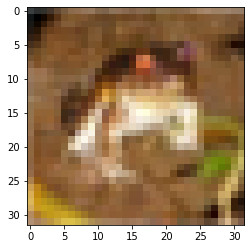

In [8]:
plt.imshow(ilk_resim)

In [9]:
print(batches_meta[b"label_names"])
print(data_batch_1[b"labels"][:15])

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9]


In [10]:
def resmin_sinif_ismi(resim_index):
    sinif_sayisi = data_batch_1[b"labels"][resim_index]
    sinif_ismi = batches_meta[b"label_names"][sinif_sayisi]
    return sinif_ismi.decode("ascii")

In [11]:
print(resmin_sinif_ismi(0))

frog


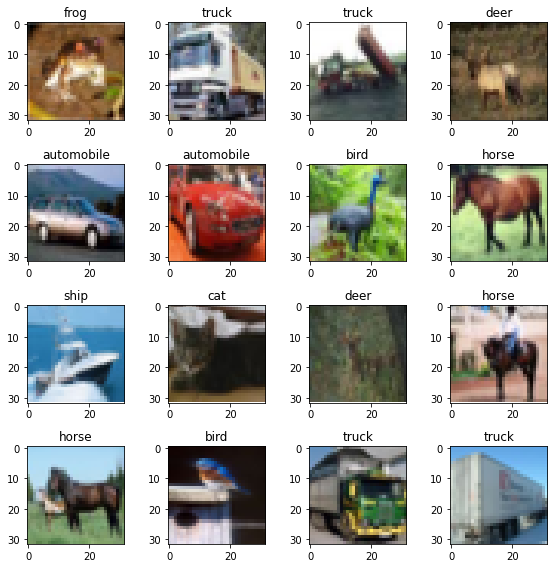

In [12]:
plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title(resmin_sinif_ismi(i))
    plt.imshow(resmi_donustur(tum_resimler[i]))

plt.tight_layout()
plt.show()

In [13]:
def l1_distance(resim_1, resim_2):
    fark = np.abs(resim_1.astype(int) - resim_2.astype(int))
    toplam_fark = np.sum(fark)
    return toplam_fark

In [14]:
def en_yakin_komsu_l1(resim_indeksi):
    aranan_resim = tum_resimler[resim_indeksi]
    min_fark = sys.maxsize
    en_yakin_resim = None

    for i, resim in enumerate(tum_resimler):
        if i == resim_indeksi:
            continue

        fark = l1_distance(aranan_resim, resim)
        if fark < min_fark:
            min_fark = fark
            en_yakin_resim = i
    
    return en_yakin_resim

In [15]:
resim_0_en_yakini = en_yakin_komsu_l1(0)
print(resim_0_en_yakini)

5166


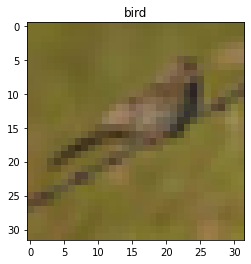

In [16]:
plt.title(resmin_sinif_ismi(resim_0_en_yakini))
plt.imshow(resmi_donustur(tum_resimler[resim_0_en_yakini]))

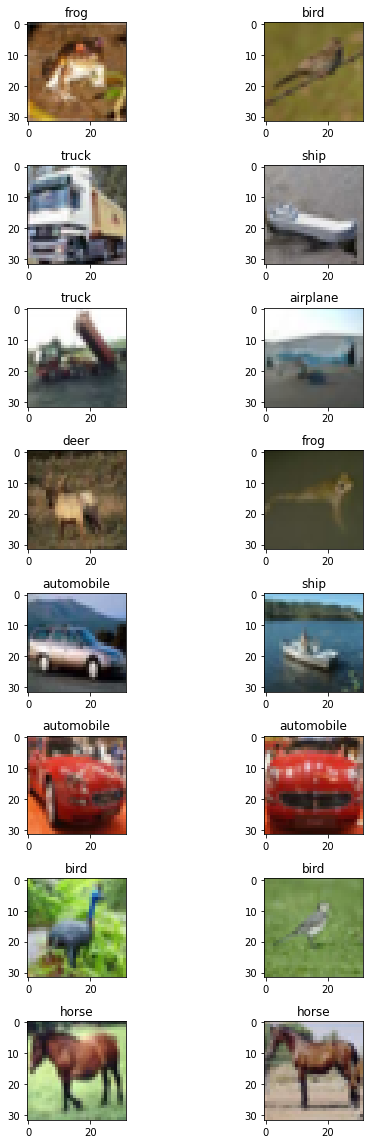

In [17]:
plt.figure(figsize=(8, 16))

for i in range(0, 8):
    plt.subplot(8, 2, i*2+1)
    plt.title(resmin_sinif_ismi(i))
    plt.imshow(resmi_donustur(tum_resimler[i]))

    en_yakin_resim = en_yakin_komsu_l1(i)
    plt.subplot(8, 2, i*2+2)
    plt.title(resmin_sinif_ismi(en_yakin_resim))
    plt.imshow(resmi_donustur(tum_resimler[en_yakin_resim]))

plt.tight_layout()
plt.show()

In [18]:
def l2_distance(resim_1, resim_2):
    # fark_kare = np.square(resim_1.astype(int) - resim_2.astype(int))
    # fark = np.sqrt(np.sum(fark_kare))
    fark = np.linalg.norm(resim_1.astype(int) - resim_2.astype(int))
    return fark

In [19]:
def en_yakin_komsu_l2(resim_indeksi):
    aranan_resim = tum_resimler[resim_indeksi]
    min_fark = sys.maxsize
    en_yakin_resim = None

    for i, resim in enumerate(tum_resimler):
        if i == resim_indeksi:
            continue

        fark = l2_distance(aranan_resim, resim)
        if fark < min_fark:
            min_fark = fark
            en_yakin_resim = i
    
    return en_yakin_resim

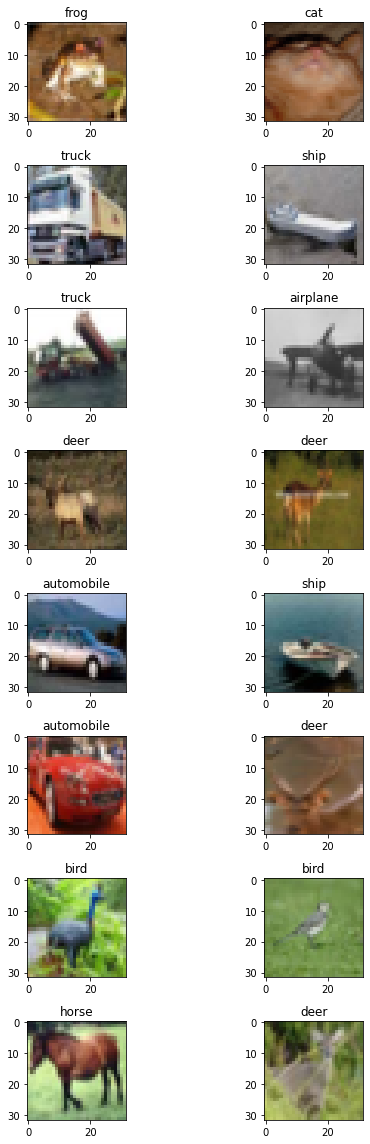

In [20]:
plt.figure(figsize=(8, 16))

for i in range(0, 8):
    plt.subplot(8, 2, i*2+1)
    plt.title(resmin_sinif_ismi(i))
    plt.imshow(resmi_donustur(tum_resimler[i]))

    en_yakin_resim = en_yakin_komsu_l2(i)
    plt.subplot(8, 2, i*2+2)
    plt.title(resmin_sinif_ismi(en_yakin_resim))
    plt.imshow(resmi_donustur(tum_resimler[en_yakin_resim]))

plt.tight_layout()
plt.show()

In [21]:
def k_en_yakin_komsu(resim_indeksi, k):
    aranan_resim = tum_resimler[resim_indeksi]
    farklar = []

    for resim in tum_resimler:
        fark = l1_distance(aranan_resim, resim)
        farklar.append(fark)

    komsu_indeksleri = np.argsort(farklar)
    k_komsu_indeksleri = komsu_indeksleri[0:k]
    k_komsu_siniflari = [resmin_sinif_ismi(k) for k in k_komsu_indeksleri]
    cogunluk_oyu = Counter(k_komsu_siniflari).most_common(1)[0][0]

    return k_komsu_indeksleri, cogunluk_oyu


En yakın resimlerin indeksleri: [   0 5166 1184 5583 5017]
5-NN tahmini: frog


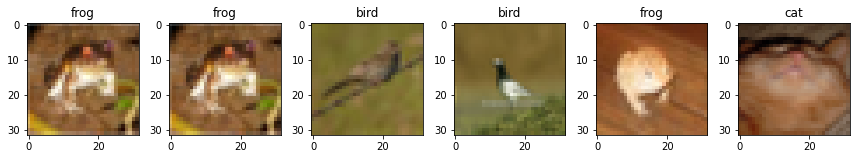

In [26]:
resim = 0
k = 5
indeksler, sinif = k_en_yakin_komsu(resim, k)

print(f"En yakın resimlerin indeksleri: {indeksler}")
print(f"{k}-NN tahmini: {sinif}")

plt.figure(figsize=(12, 12))

plt.subplot(1, k+1, 1)
plt.title(resmin_sinif_ismi(resim))
plt.imshow(resmi_donustur(tum_resimler[resim]))

for i, resim_indeksi in enumerate(indeksler):
    plt.subplot(1, k+1, i+2)
    plt.title(resmin_sinif_ismi(resim_indeksi))
    plt.imshow(resmi_donustur(tum_resimler[resim_indeksi]))

plt.tight_layout()
plt.show()